#**GRIP May 2021**

#**Author: Hussain Mohd Raza**

##*Task 1- Predict the percentage of a student based on the no. of study hours using Supervised ML.* 
##*This is a simple linear regression task as it involves just two variables.*

In [4]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##**Importing Dataset**

In [11]:
#reading data from the link
url = "http://bit.ly/w-data"
my_data = pd.read_csv(url)
print("Data imported successfully!")
print("The given dataset is:")
my_data

Data imported successfully!
The given dataset is:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [17]:
print("No of rows and columns in given dataset are:")
my_data.head
my_data.shape

No of rows and columns in given dataset are:


(25, 2)

##**Visualising Dataset**

####Now we will plot the data points on a 2-D graph to see if we find any relationship between the given data.

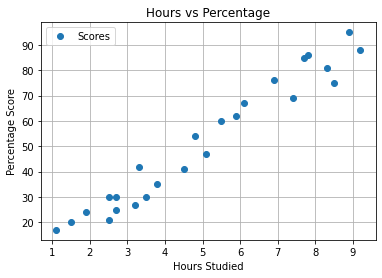

In [101]:
 # Plotting the distribution of scores
my_data.plot(x ='Hours', y ='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

####From the graph above we can see clearly that there is a positive linear relationship between the two variables, i.e, hours studied and percentage scored

##**Preparing the Data**

####We will divide the data into "attributes"(input) and "labels"(output).
####After that we will split the whole dataset into 2 parts - testing data and training data.

In [74]:
X = my_data.iloc[:, :-1].values  
y = my_data.iloc[:, 1].values

####Now by using Scikit-Learn's built in train_test_split() method we can split the data into training and testing sets:

In [77]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

##**Training the Algorithm**

In [79]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
 
print("Training complete.")

Training complete.


##**Visualizing the model**

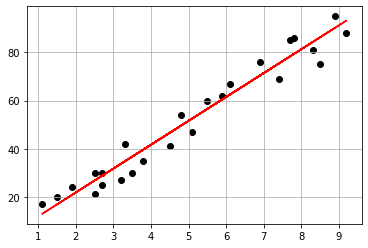

In [108]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
 
# Plotting for the test data
plt.scatter(X, y, color = "black")
plt.plot(X, line, color = "red");
plt.grid()
plt.show()

##**Making Predictions**

In [109]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [96]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


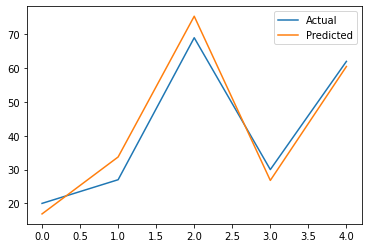

In [110]:
df.plot()

###**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [99]:
hours=9.25
own_pred = regressor.predict([[hours]])
print('No. of Hours={}'.format(hours))
print("The predicted percentage score if a student studied for",hours,"hours is",format(own_pred[0]))

No. of Hours=9.25
The predicted percentage score if a student studied for 9.25 hours is 93.69173248737539


##**Evaluating the model**

####The last step is to evaluate our model by calculating Mean Absolute Error

In [106]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
